In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Read in the geodata

In [3]:
USstates = gpd.read_file('../data/input/usa-states-census-2014.shp')
UScounties = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

Example drawings of states and counties

<AxesSubplot:>

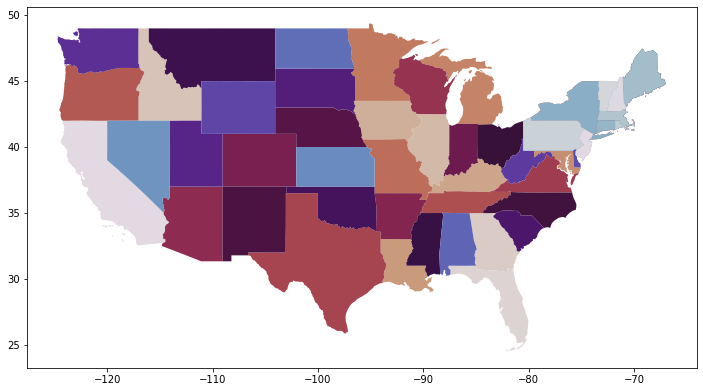

In [4]:
USstates.plot(cmap='twilight_r', figsize=(12, 12))

<AxesSubplot:>

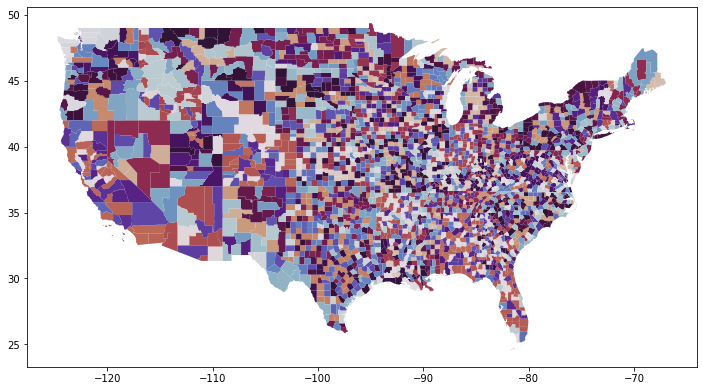

In [5]:
# Make sure the "id" column is an integer
UScounties.id = UScounties.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
UScounties = UScounties[~UScounties.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
UScounties.plot(cmap='twilight_r', figsize=(12,12))

Read in the data of the project

In [11]:
df = pd.read_csv('states/FINAL.csv')
print(len(df))
df = df.loc[df['country'] == 'US', :].reset_index()
print(len(df))

170207
170207


Add the mean score to the data

In [12]:
drawing_data = {}
for name in df['States'].unique():
    subsub = df.loc[df['States'] == name]
    drawing_data[name] = len(subsub['score'])

In [13]:
ll = []
for name in USstates['NAME']:
    ll.append(drawing_data[name])
USstates['NumberOfTweets'] = ll

In [20]:
USstates.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,NumberOfTweets
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",33360
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",4553
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",11056
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",5916
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",427


Text(0.5, 1.0, 'Number of tweets per state')

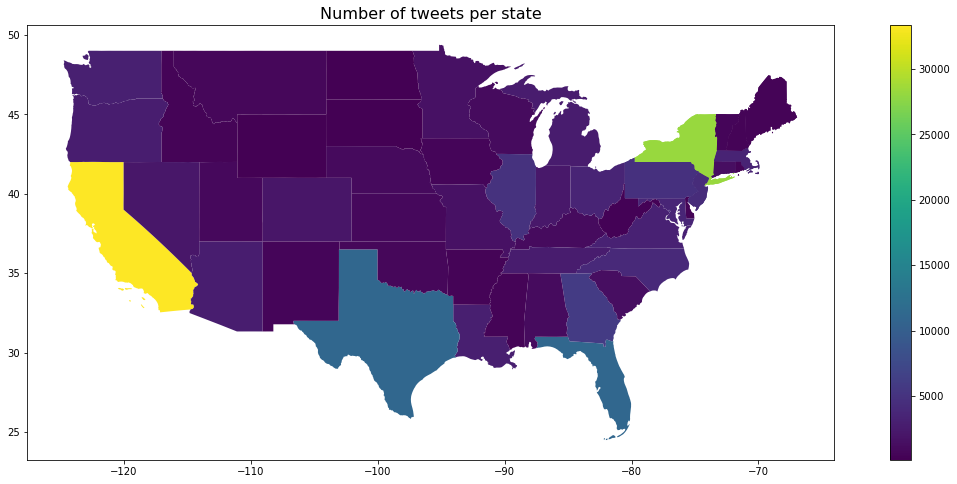

In [17]:
USstates.plot(figsize=(20, 8), column='NumberOfTweets', legend=True)
plt.title('Number of tweets per state', fontsize=16)

<BarContainer object of 58 artists>

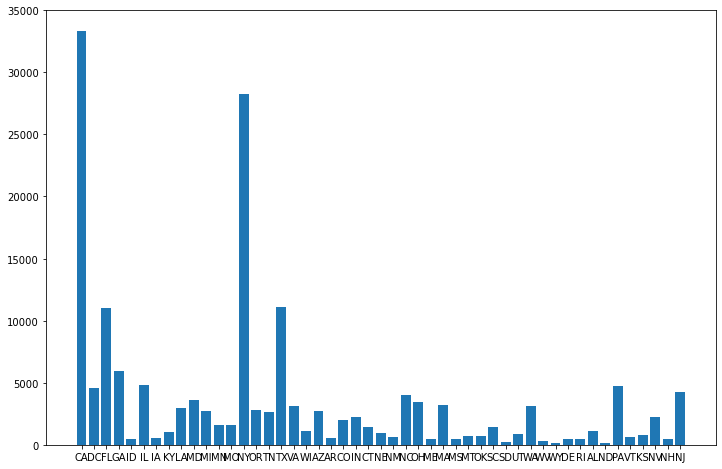

In [22]:
fig, axis = plt.subplots(figsize=(12, 8))
axis.bar(USstates['STUSPS'], USstates['NumberOfTweets'], order)

add number of tweets to the dataset

In [200]:
drawing_data = {}
for name in subset['States'].unique():
    subsub = subset.loc[subset['States'] == name]
    drawing_data[name] = len(subsub)

In [201]:
ll = []
for name in USstates['NAME']:
    ll.append(drawing_data[name])
USstates['N_tweets'] = ll

<AxesSubplot:>

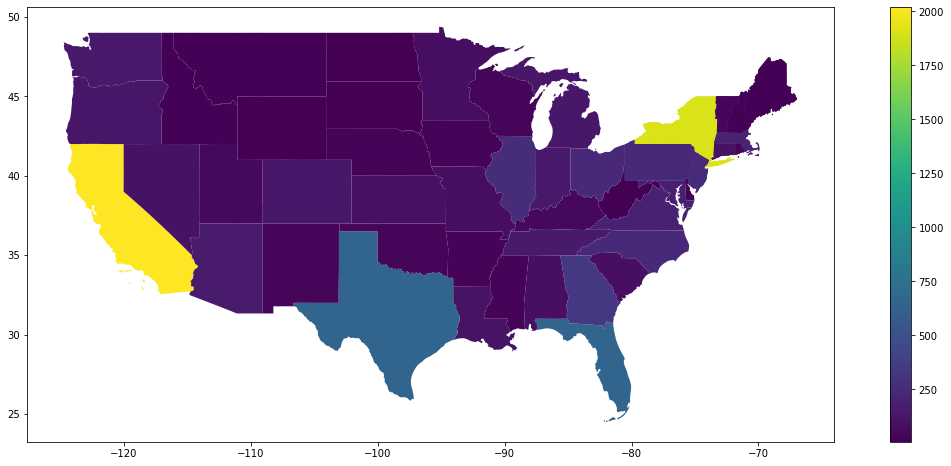

In [208]:
USstates.plot(figsize=(20, 8), column='N_tweets', legend=True)

In [233]:
west = USstates[USstates['region'] == 'West']['GEOID'].to_list()
WEST = UScounties[UScounties['STATE'].isin(west)]
WEST

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
23,6005,0500000US06005,06,005,Amador,County,594.583,"POLYGON ((-120.99550 38.22541, -121.02708 38.3..."
24,6021,0500000US06021,06,021,Glenn,County,1313.947,"POLYGON ((-122.93765 39.79816, -122.04647 39.7..."
25,6033,0500000US06033,06,033,Lake,County,1256.464,"POLYGON ((-122.62740 38.66751, -122.82159 38.8..."
26,6043,0500000US06043,06,043,Mariposa,County,1448.816,"POLYGON ((-120.38767 37.63336, -120.38733 37.6..."
27,6055,0500000US06055,06,055,Napa,County,748.362,"POLYGON ((-122.10328 38.51335, -122.08884 38.3..."
...,...,...,...,...,...,...,...,...
3207,56001,0500000US56001,56,001,Albany,County,4273.840,"POLYGON ((-105.28391 42.43140, -105.27375 42.0..."
3208,56007,0500000US56007,56,007,Carbon,County,7897.578,"POLYGON ((-107.00061 41.00344, -107.31779 41.0..."
3209,56011,0500000US56011,56,011,Crook,County,2854.408,"POLYGON ((-104.05581 44.69134, -104.05588 44.5..."
3210,56013,0500000US56013,56,013,Fremont,County,9183.814,"POLYGON ((-109.04386 42.26368, -109.04380 42.4..."


In [223]:
subset['Counties'][0].split(' County')[0]

'Riverside'

In [226]:
UScounties.loc[UScounties['NAME'] == 'Riverside']

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
718,6065,0500000US06065,06,065,Riverside,County,7206.48,"POLYGON ((-117.28448 34.01902, -117.22537 34.0..."


In [224]:
UScounties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


KeyError: 'score'

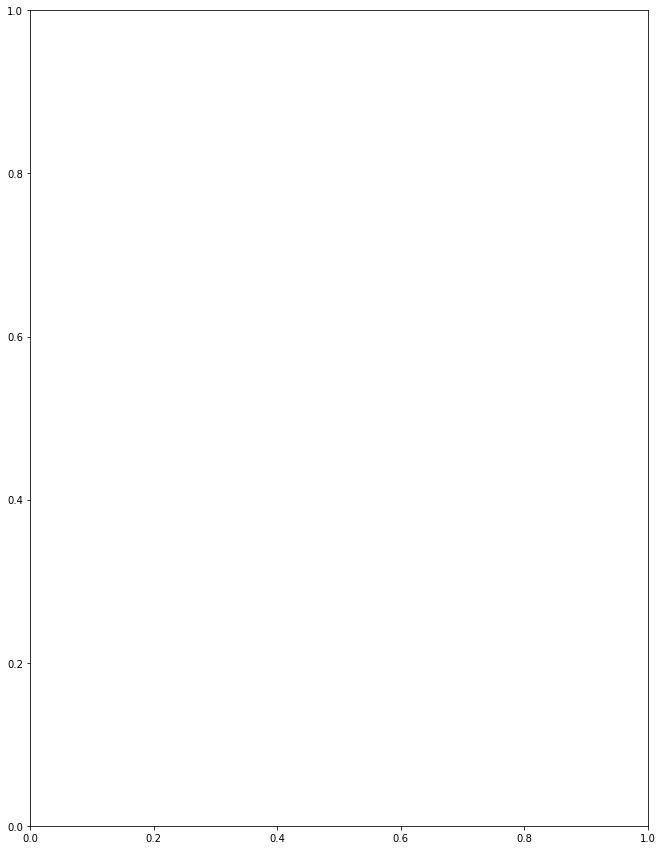

In [219]:
UScounties[UScounties['STATE'].isin(southwest)].plot(figsize=(15,15), column='score')

In [175]:
subset

,index,valid_id,date,full_name,country,lon,lat,followers,retweets,replies,likes,quotes,coordinates,name,admin1,admin2,score,Counties
0,73413,1344177811964227585,2020-12-30T07:05:38.000Z,"San Diego, CA",US,-117.099756,32.902269,1376,0,0,0,0,"(32.90226944, -117.09975556)",Poway,California,San Diego County,0.500000,San Diego County
1,73420,1344182750652334080,2020-12-30T07:25:16.000Z,"Orlando, FL",US,-81.377500,28.542100,1309,0,0,0,0,"(28.5421, -81.3775)",Orlando,Florida,Orange County,0.000000,Orange County
2,73423,1344185007120805920,2020-12-30T07:34:14.000Z,"Ontario, CA",US,-117.566186,34.072878,783,0,0,0,0,"(34.07287778, -117.56618616)",Rancho Cucamonga,California,San Bernardino County,0.156250,San Bernardino County
3,73425,1344191905211572225,2020-12-30T08:01:38.000Z,"San Antonio, TX",US,-98.653400,29.418300,77,0,0,0,0,"(29.4183, -98.6534)",Lackland Air Force Base,Texas,Bexar County,0.394444,Bexar County
4,73426,1344192179762208770,2020-12-30T08:02:44.000Z,"North Auburn, CA",US,-121.055448,38.952026,426,0,0,0,0,"(38.95202637, -121.05544757)",North Auburn,California,Placer County,0.300000,Placer County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74651,1344834067121008643,2021-01-01T02:33:22.000Z,"Broken Arrow, OK",US,-95.783600,36.036300,96,0,0,0,0,"(36.0363, -95.7836)",Broken Arrow,Oklahoma,Tulsa County,0.409091,Tulsa County
496,74653,1344834745557864450,2021-01-01T02:36:03.000Z,"New Jersey, USA",US,-74.281627,40.545263,15,0,0,0,0,"(40.54526342, -74.28162701)",Woodbridge,New Jersey,Middlesex County,0.404687,Middlesex County
497,74655,1344835490143477764,2021-01-01T02:39:01.000Z,"Los Angeles, CA",US,-118.274543,34.067538,521,0,0,0,0,"(34.06753797, -118.27454326)",Echo Park,California,Los Angeles County,0.317100,Los Angeles County
498,74656,1344835699871264768,2021-01-01T02:39:51.000Z,"Baltimore, MD",US,-76.601380,39.285340,5743,0,0,2,0,"(39.28534, -76.60138)",Baltimore,Maryland,City of Baltimore,0.066667,NaN
